<a href="https://colab.research.google.com/github/adhalya/Analise_Campanha_Credito/blob/main/An%C3%A1lise_Campanha_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Dicion√°rio



> Os dados contidos aqui s√£o sint√©ticos, n√£o refletem a realidade e foram utilizados apenas como demonstra√ß√£o de como foi desenvolvido um projeto real de tratamento e an√°lise de dados. Qualquer d√∫vida, contacte-me atrav√©s do linkedin.

---

*Perguntas Pessoais:*
- **S2A** - Como voce se identifica?

*Pergunta Sobre a Marca:*
- **BRAD31** - Quando voc√™ pensa em previd√™ncia privada qual √© a primeira marca que vem a cabe√ßa?

*Informa√ß√µes de Cadastro:*
- **user_email** - E-mail utilizado para preenchimento de formul√°rio

*Dataframe sem ajuste (amostra):*
- **df1_inicio** - Dataframe antes da campanha
- **df2_inicio** - Dataframe depois da campanha
- **df_inicio** - Dataframe com antes e depois junto


Dataframe com ajuste (amostra):
- **df1_final** - Dataframe antes da campanha
- **df2_final** - Dataframe depois da campanha
- **df_final** - Dataframe com antes e depois junto

## Bibliotecas / Importa√ß√£o de arquivo

In [8]:
# Bibliotecas de manipula√ß√£o e tratamento de dados
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.contingency_tables import mcnemar
from collections import Counter


In [9]:
df1 = pd.read_csv("https://raw.githubusercontent.com/adhalya/Analise_Campanha_Credito/refs/heads/main/Base%20de%20Dados/BRASILPREV_ANTES.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/adhalya/Analise_Campanha_Credito/refs/heads/main/Base%20de%20Dados/BRASILPREV_AP%C3%93S.csv")

In [10]:
df1.head()

user_email BRAD37                                             BRAD43  \
0    01@gmail.com    NaN                                                NaN   
1  02@hotmail.com    NaN                                                NaN   
2    03@gmail.com    NaN  Alta preocupa√ß√£o , tenho medo e isso influenci...   
3    04@gmail.com    NaN  Alta preocupa√ß√£o , tenho medo e isso influenci...   
4    05@gmail.com    NaN  Nenhuma preocupa√ß√£o, confio completamente nas ...   

  BRAD35 BRAD45           S5A BRAD39 BRAD36                   S2A  \
0    NaN    NaN  Desempregado    NaN    NaN              Feminino   
1    NaN    NaN      Aut√¥nomo    NaN    NaN             Masculino   
2    NaN    N√£o     Estudante    NaN    NaN             Masculino   
3    NaN    N√£o      Aut√¥nomo    NaN    NaN  Prefiro n√£o informar   
4    NaN    N√£o     Estudante    NaN    NaN             Masculino   

                                              BRAD38  ... BRAD40  \
0  Nenhum conhecimento, nunca ouvi falar sobre pr...  ...    NaN   
1  Nenhum conhecimento, nunca ouvi falar sobre pr...  ...    NaN   
2  Nenhum conhecimento, nunca ouvi falar sobre pr...  ...    NaN   
3  Nenhum conhecimento, nunca ouvi falar sobre pr...  ...    NaN   
4  Nenhum conhecimento, nunca ouvi falar sobre pr...  ...    NaN   

                      S6A BRAD34             BRAD31 BRAD32             S4A  \
0                     NaN    NaN               Inss    NaN    Minas Gerais   
1  De R$ 1.000 a R$ 3.000    NaN            n√£o sei    NaN       S√£o Paulo   
2                     NaN    NaN               sony    NaN  Esp√≠rito Santo   
3       Acima de R$ 8.000    NaN  Pris√£o domiciliar    NaN  Esp√≠rito Santo   
4                     NaN    NaN        Privacidade    NaN       S√£o Paulo   

  BRAD41                 S3A BRAD33 BRAD42  
0    NaN  Entre 18 e 27 anos    NaN    NaN  
1    NaN  Entre 45 e 60 anos    NaN    NaN  
2    NaN  Entre 18 e 27 anos    NaN    NaN  
3    NaN  Entre 45 e 60 anos    NaN    NaN  
4    NaN    Menos de 18 anos    NaN    NaN  

[5 rows x 22 columns]

In [11]:
df2.head()

user_email                BRAD41  \
0   01@gmail.com                   NaN   
1   02@gmail.com                   NaN   
2   03@gmail.com                   NaN   
3  04@uol.com.br  WhatsApp via ChatBot   
4  05@bol.com.br                   NaN   

                                              BRAD38  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Conhecimento muito baixo, j√° ouvi falar, mas n...   
4  Nenhum conhecimento, nunca ouvi falar sobre pr...   

                                              BRAD31  \
0                                                NaN   
1                                                NaN   
2                                            Privada   
3                                                 Bb   
4  Pode ser uma grande ajuda,para pessoas daninha...   

                                              BRAD46     BRAD32 BRAD33  \
0            Ita√∫ Previd√™ncia|Nenhuma das anteriores        NaN    NaN   
1  Caixa Previd√™ncia|Bradesco Previd√™ncia |XP Pre...        NaN    NaN   
2                             Nenhuma das anteriores        NaN    NaN   
3                                                NaN  N√£o tenho    NaN   
4                                                NaN        NaN    NaN   

                      S6A  BRAD39                 BRAD44  ...  \
0                     NaN     NaN     Confian√ßa moderada  ...   
1                     NaN     NaN         Confian√ßa alta  ...   
2                     NaN     NaN  Confian√ßa muito baixa  ...   
3                     NaN  Boleto     Confian√ßa moderada  ...   
4  De R$ 1.000 a R$ 3.000     NaN                    NaN  ...   

                                  BRAD37  BRAD36 BRAD35              BRAD42  \
0                                    NaN     NaN    NaN                 NaN   
1                                    NaN     NaN    NaN                 NaN   
2                                    NaN     NaN    NaN                 NaN   
3  Todo m√™s, como parte do meu or√ßamento  At√© 5%    NaN  Ajudar quem eu amo   
4                                    NaN     NaN    NaN                 NaN   

                                              BRAD43        S4A  \
0  Preocupa√ß√£o moderada, estou atento, mas ainda ...        NaN   
1                                                NaN        NaN   
2  Nenhuma preocupa√ß√£o, confio completamente nas ...        NaN   
3  Preocupa√ß√£o moderada, estou atento, mas ainda ...        NaN   
4                                                NaN  S√£o Paulo   

                  S3A BRAD34        S2A BRAD45  
0                 NaN    NaN        NaN    N√£o  
1                 NaN    NaN   Feminino    N√£o  
2  Entre 28 e 45 anos    NaN        NaN    N√£o  
3                 NaN    NaN        NaN    N√£o  
4    Acima de 60 anos    NaN  Masculino    NaN  

[5 rows x 22 columns]

## Fase 1: Planejamento

**Revis√£o dos dados coletados nas duas rodadas de pesquisa, defini√ß√£o das m√©tricas de an√°lise e testes estat√≠sticos apropriados.**

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_email  1228 non-null   object
 1   BRAD37      790 non-null    object
 2   BRAD43      1108 non-null   object
 3   BRAD35      266 non-null    object
 4   BRAD45      1097 non-null   object
 5   S5A         1223 non-null   object
 6   BRAD39      818 non-null    object
 7   BRAD36      791 non-null    object
 8   S2A         1221 non-null   object
 9   BRAD38      1224 non-null   object
 10  BRAD46      1104 non-null   object
 11  BRAD44      1104 non-null   object
 12  BRAD40      814 non-null    object
 13  S6A         817 non-null    object
 14  BRAD34      266 non-null    object
 15  BRAD31      1225 non-null   object
 16  BRAD32      1060 non-null   object
 17  S4A         1220 non-null   object
 18  BRAD41      810 non-null    object
 19  S3A         1221 non-null   object
 20  BRAD33  

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_email  2280 non-null   object
 1   BRAD41      1120 non-null   object
 2   BRAD38      2277 non-null   object
 3   BRAD31      2269 non-null   object
 4   BRAD46      1527 non-null   object
 5   BRAD32      1511 non-null   object
 6   BRAD33      467 non-null    object
 7   S6A         1199 non-null   object
 8   BRAD39      1143 non-null   object
 9   BRAD44      1539 non-null   object
 10  S5A         2276 non-null   object
 11  BRAD40      1131 non-null   object
 12  BRAD37      1028 non-null   object
 13  BRAD36      1032 non-null   object
 14  BRAD35      460 non-null    object
 15  BRAD42      1113 non-null   object
 16  BRAD43      1537 non-null   object
 17  S4A         2275 non-null   object
 18  S3A         2275 non-null   object
 19  BRAD34      463 non-null    object
 20  S2A     

**O objetivo desta an√°lise √© verificar se houve diferen√ßa significativa nas respostas sobre previd√™ncia privada antes e ap√≥s a campanha. Para este estudo, ser√£o utilizadas as vari√°veis BRAD31 e S2A, que servir√£o como vari√°veis-modelo, representando a forma como as an√°lises reais foram desenvolvidas.**

#### Entendendo os dados da coluna BRAD31

*   BRAD31 - Quando voc√™ pensa em previd√™ncia privada qual √© a primeira marca que vem a cabe√ßa?

In [14]:
from IPython.display import display, HTML

BRAD31 = df1['BRAD31'].value_counts().sort_values(ascending=False).reset_index()
BRAD31.columns = ['Banco', 'Cita√ß√µes']

# Limitando a visualiza√ß√£o da sa√≠da usando HTML com scroll
display(HTML(f"""
<div style="height:300px; overflow:auto; border:1px solid lightgray;">
    {BRAD31.to_html(index=False)}
</div>
"""))


## Fase 2: Prepara√ß√£o dos dados

**Consolida√ß√£o das informa√ß√µes, limpeza e tratamento dos dados extra√≠dos dos arquivos CSV's.**

### Filtrando e declarado dataframes iniciais

In [15]:
# Utilizando os e-mails para comparar os dois dataframes
emails_em_comum = set(df1['user_email']) & set(df2['user_email'])

df1_filtrado = df1[df1['user_email'].isin(emails_em_comum)].copy()
df2_filtrado = df2[df2['user_email'].isin(emails_em_comum)].copy()


In [16]:
# Usando os e-mails em comum para unir as vari√°veis BRAD31 antes e ap√≥s a campanha
df_inicio = pd.merge(
    df1_filtrado[['user_email', 'BRAD31']],
    df2_filtrado[['user_email', 'BRAD31']],
    on='user_email',
    suffixes=('_antes', '_depois')
)

In [17]:
# Identificando a mudan√ßa das respostas antes e ap√≥s a campanha
df_inicio['mudou'] = df_inicio['BRAD31_antes'] != df_inicio['BRAD31_depois']
df_inicio['mudou'].value_counts()

mudou
True     861
False     14
Name: count, dtype: int64

Por se tratar de dados sens√≠veis, os e-mails foram renomeados para n√∫meros antes do @. Os resultados obtidos nessa an√°lise n√£o condizem com os resultados do dataset original, este serve apenas como objeto de estudo.

In [18]:
df_mudancas = df_inicio[df_inicio['mudou']][['user_email', 'BRAD31_antes', 'BRAD31_depois']]

# Transformar em HTML com scroll
display(HTML(f"""
<div style="height:400px; overflow:auto; border:1px solid lightgray;">
    {df_mudancas.to_html(index=False)}
</div>
"""))


In [19]:
# Criar DataFrames isolados para BRAD31_antes e BRAD31_depois
df1_inicio = df_inicio[['user_email', 'BRAD31_antes']].copy()
df2_inicio = df_inicio[['user_email', 'BRAD31_depois']].copy()

# Renomear as colunas para manter consist√™ncia
df1_inicio = df1_inicio.rename(columns={'BRAD31_antes': 'BRAD31'})
df2_inicio = df2_inicio.rename(columns={'BRAD31_depois': 'BRAD31'})

df1_inicio.tail()

user_email    BRAD31
870  1221@gmail.com  Bradesco
871  1223@gmail.com      Jogo
872  1224@gmail.com      Nike
873  1227@gmail.com     Caixa
874  1228@gmail.com     Pulma

In [20]:
df2_inicio.tail()

user_email              BRAD31
870  1221@gmail.com  Previd√™ncia social
871  1223@gmail.com             N√£o sei
872  1224@gmail.com           Riachuelo
873  1227@gmail.com         Playstation
874  1228@gmail.com             N√£o sei

No total s√£o 874 pessoas que participaram de ambos os formul√°rios. Como temos diversas respostas em diferentes formatos, precisamos realizar um **tratamento**, classificando apenas as respostas que correspondem a alguma institui√ß√£o de previd√™ncia privada, retirando s√≠mbolos indevidos,formatanto as respostas no mesmo padr√£o de escrita (mai√∫sculas), transforamando as respostas nulas em OUTROS assim como as demais respostas que n√£o possuem rela√ß√£o com institui√ß√µes de previd√™ncia privada.

In [21]:
df_merge_valores = df_inicio.value_counts().reset_index()
df_merge_valores.columns = list(df_merge_valores.columns[:-1]) + ['Contagem']  # renomeia a √∫ltima coluna para "Contagem"

# Transformar em HTML com scroll
display(HTML(f"""
<div style="height:400px; overflow:auto; border:1px solid lightgray;">
    {df_merge_valores.to_html(index=False)}
</div>
"""))


Atrav√©s do c√≥digo acima, √© poss√≠vel verificar se o c√≥digo funcionou para identificar todas as mudan√ßas de respostas, assim como, identificar manualmente as respostas que antes foram escritas de uma forma e depois escritas de outra forma se tratando da mesma institui√ß√£o de previd√™ncia privada.

Ex.:

- Antes: Ita√∫

- Depois: Itau

A institui√ß√£o de previd√™ncia √© a mesma, por√©m, escrita de forma diferente

### Declarando dataframes ap√≥s a limpeza

#### Limpeza dos dados BRAD31

In [22]:
# Lista de nomes para filtrar
nomes_filtrar = [
    'XP', 'ITA√ö', 'ICATU', 'BRADESCO', 'CAIXA', 'BANCO DO BRASIL', 'BRASILPREV',
    'RICO', 'UNIMED', 'PORTO SEGURO', 'SANTANDER', 'MAPFRE', 'PETROS', 'PETROBRAS',
    'SAFRA', 'ALLIANZ', 'KINEA', 'GR√ÉO', 'ARCA', 'VWPP', 'PREVIDENT SENIOR',
    'ALLOS', 'C6 BANK', 'ALASKA PREVID√äNCIA', 'ONZE', 'POSITIVO', 'MERCADO PAGO', 'INTER', 'ALLOS', 'ALASKA'
]

# Dicion√°rio de sin√¥nimos e varia√ß√µes
sinonimos = {
    'ITAU': 'ITA√ö',
    'CAIXA ECONOMICA FEDERAL': 'CAIXA',
    'CAIXA ECON√îMICA FEDERAL': 'CAIXA',
    'CAIXA ECON√îMICA': 'CAIXA',
    'XP INVESTIMENTOS': 'XP',
    'BB': 'BRASILPREV',
    'C6': 'C6 BANK',
    'BRADESCO SEGUROS': 'BRADESCO',
    'BRASIL PREVIDENCIA': 'BRASILPREV',
    'CAIXA ECONOMICA': 'CAIXA',
    'AILOS': 'ALLOS',
    'CAIXA PREVIDENCIA': 'CAIXA',
    'BRASIL PREV': 'BRASILPREV',
    'IT√ÅU': 'ITA√ö',
    'BRADESCO PREVIDENCIA': 'BRADESCO',
    'GRAO': 'GR√ÉO',
    'ITA√ö PREVID√äNCIA': 'ITA√ö',
    'BANCO DO BRASIL': 'BRASILPREV'
}

# Fun√ß√£o para padronizar os textos
def padronizar_texto(texto):
    if pd.isna(texto):  # Verificar se o valor √© nulo
        return texto
    texto = str(texto).upper().strip()
    # Remover caracteres especiais e m√∫ltiplos espa√ßos
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# Fun√ß√£o para mapear sin√¥nimos
def mapear_sinonimos(texto):
    if pd.isna(texto):
        return texto
    texto = str(texto)
    for chave, valor in sinonimos.items():
        if chave in texto:
            return valor
    return texto

# Fun√ß√£o para filtrar e substituir por "OUTROS"
def filtrar_nomes(texto):
    if pd.isna(texto):
        return texto
    # Ignorar se for n√∫mero puro (ex: "123", "2024")
    if texto.isdigit():
        return 'OUTROS'
    if texto in nomes_filtrar:
        return texto
    else:
        return 'OUTROS'

# Fun√ß√£o para processar uma coluna
def processar_coluna(coluna):
    coluna_padronizada = coluna.apply(padronizar_texto)
    coluna_mapeada = coluna_padronizada.apply(mapear_sinonimos)
    coluna_filtrada = coluna_mapeada.apply(filtrar_nomes)
    return coluna_filtrada



# Criar um novo DataFrame para armazenar os dados processados
df_final = df_inicio.copy()

# Aplicar o processamento √†s colunas desejadas
df_final['BRAD31_antes'] = processar_coluna(df_final['BRAD31_antes'])
df_final['BRAD31_depois'] = processar_coluna(df_final['BRAD31_depois'])

In [23]:
# Visualizando o resultado do tratamento antes e depois
df_subset = df_final[['BRAD31_antes', 'BRAD31_depois']]

display(HTML(f"""
<div style="height:400px; overflow:auto; border:1px solid lightgray;">
    {df_subset.to_html(index=False)}
</div>
"""))


In [24]:
# Criar DataFrames isolados para BRAD31_antes e BRAD31_depois
df1_final = df_final[['user_email', 'BRAD31_antes']].copy()
df2_final = df_final[['user_email', 'BRAD31_depois']].copy()

# Renomear as colunas para manter consist√™ncia
df1_final = df1_final.rename(columns={'BRAD31_antes': 'BRAD31'})
df2_final = df2_final.rename(columns={'BRAD31_depois': 'BRAD31'})

Para facilitar a an√°lise dos dados na etapa de an√°lise, foi necess√°rio realizar o tratamento dos dados. As respostas que continham institui√ß√µes que fornecem previd√™ncia foram mantidas com o nome de suas institui√ß√µes, j√° as respostas aleat√≥rias, foram consideradas como *OUTROS*, podendo posteriormente serem exclu√≠das das an√°lises. As respostas que continham *BANCO DO BRASIL*, *BB*, ou semelhantes, foram classificadas como *BRASILPREV* que √© o nome oficial da institui√ß√£o de previd√™ncia que representa o *BANCO DO BRASIL*.


Para manter a consist√™ncia dos dados, foi separado os dataframes com os dados tratados em **df1_final** e **df2_final**, onde o objetivo √© mant√™-los com todas as vari√°veis com o devido tratamento.

#### Verificando a limpeza dos dados (antes e ap√≥s limpeza)

Na linha de c√≥digo a seguir vai ser criado um dataframe que recebe todas as vari√°veis antes e ap√≥s a limpeza para verificar se todas as institui√ß√µes passaram pelo devido tratamento.

In [25]:
# Criar o DataFrame de compara√ß√£o
df_comparacao = pd.DataFrame({
    'user_email': df_inicio['user_email'],  # Manter o e-mail como refer√™ncia
    'BRAD31_antes_inicio': df1_inicio['BRAD31'],  # Antes da limpeza
    'BRAD31_depois_inicio': df2_inicio['BRAD31'],  # Antes da limpeza
    'BRAD31_antes_final': df1_final['BRAD31'],  # Ap√≥s a limpeza
    'BRAD31_depois_final': df2_final['BRAD31']  # Ap√≥s a limpeza
})

# Transformar em HTML com scroll
display(HTML(f"""
<div style="height:400px; overflow:auto; border:1px solid lightgray;">
    {df_comparacao.to_html(index=False)}
</div>
"""))


#### Verificando a quantidade de valores antes e ap√≥s a campanha

In [26]:
df1_final['BRAD31'].value_counts()

BRAD31
OUTROS              626
BRADESCO             68
CAIXA                48
ITA√ö                 48
BRASILPREV           41
XP                   12
SANTANDER             6
INTER                 4
PORTO SEGURO          3
SAFRA                 2
ALLIANZ               2
ICATU                 2
MERCADO PAGO          2
C6 BANK               2
ARCA                  2
PETROBRAS             1
RICO                  1
UNIMED                1
PREVIDENT SENIOR      1
ALLOS                 1
GR√ÉO                  1
POSITIVO              1
Name: count, dtype: int64

In [27]:
df2_final['BRAD31'].value_counts()

BRAD31
OUTROS          684
CAIXA            48
BRADESCO         41
ITA√ö             40
BRASILPREV       35
XP                8
PETROBRAS         3
INTER             3
SANTANDER         3
UNIMED            2
PETROS            1
RICO              1
ARCA              1
PORTO SEGURO      1
Name: count, dtype: int64

Antes da campanha, foram citadas 21 institui√ß√µes, enquanto ap√≥s a campanha, foram citadas 13 institui√ß√µes.

In [28]:
# Filtrando as respostas que possuem pelo menos o nome de uma institui√ß√£o financeira
df_final = df_final[
    (df_final['BRAD31_antes'] != 'OUTROS') |
    (df_final['BRAD31_depois'] != 'OUTROS')
]

df_final.tail()

user_email BRAD31_antes BRAD31_depois  mudou
863  1211@gmail.com         ITA√ö        OUTROS   True
867  1218@gmail.com       OUTROS          ITA√ö   True
869  1220@gmail.com           XP        OUTROS   True
870  1221@gmail.com     BRADESCO        OUTROS   True
873  1227@gmail.com        CAIXA        OUTROS   True

## Fase 3: An√°lise

**Extra√ß√£o de insights nos dois conjuntos de dados para compar√°-los, identificando padr√µes, mudan√ßas na percep√ß√£o da marca e outros fatores influentes ao longo do per√≠odo analisado. An√°lise detalhada dos dados, destacando tend√™ncias e fatores determinantes no impacto da campanha.**

#### Tabela de Frequ√™ncias

#### Tabela de Frequ√™ncia de Antes da Campanha

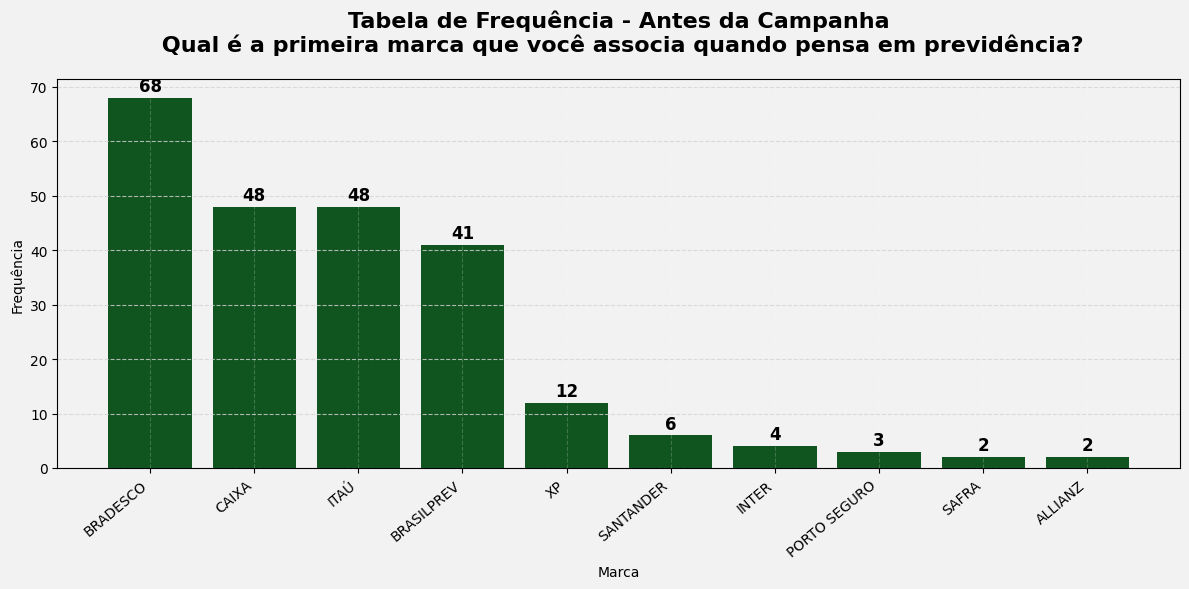

In [29]:
# Filtrar para remover a categoria "OUTROS"
respostas_df1_filtradas = df1_final[df1_final['BRAD31'] != 'OUTROS']['BRAD31']

# Contar a frequ√™ncia das respostas filtradas
contagem_df1 = respostas_df1_filtradas.value_counts()

# Selecionar as 20 mais citadas (ou aumente se quiser mais)
top_10 = contagem_df1.head(10)

# Criar o gr√°fico de barras
plt.figure(figsize=(12, 6), facecolor="#F2F2F2")  # fundo da figura
plt.gca().set_facecolor("#F2F2F2")
bars = plt.bar(top_10.index, top_10.values, color='#105420')

# Adicionar r√≥tulos alinhados √† direita
plt.xticks(range(len(top_10.index)), top_10.index, rotation=40, ha='right')

# Adicionar os valores de frequ√™ncia acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posi√ß√£o x (centro da barra)
        height + 0.5,  # Posi√ß√£o y (acima da barra)
        f'{int(height)}',  # Texto (valor da frequ√™ncia)
        ha='center',  # Alinhamento horizontal (centralizado)
        va='bottom',  # Alinhamento vertical (base no topo da barra)
        fontsize=12,
        fontweight='bold'
    )

# Adicionar t√≠tulo e r√≥tulos dos eixos
plt.title("Tabela de Frequ√™ncia - Antes da Campanha\n Qual √© a primeira marca que voc√™ associa quando pensa em previd√™ncia?", fontsize=16, pad=20, fontweight='semibold')
plt.xlabel("Marca")
plt.ylabel("Frequ√™ncia")

# Ajustar layout e grade
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.8, color="lightgray")
plt.grid(axis='x', linestyle='--', alpha=0.2, color="white")

# Exibir o gr√°fico
plt.show()

#### Tabela de Frequ√™ncia de Ap√≥s a Campanha

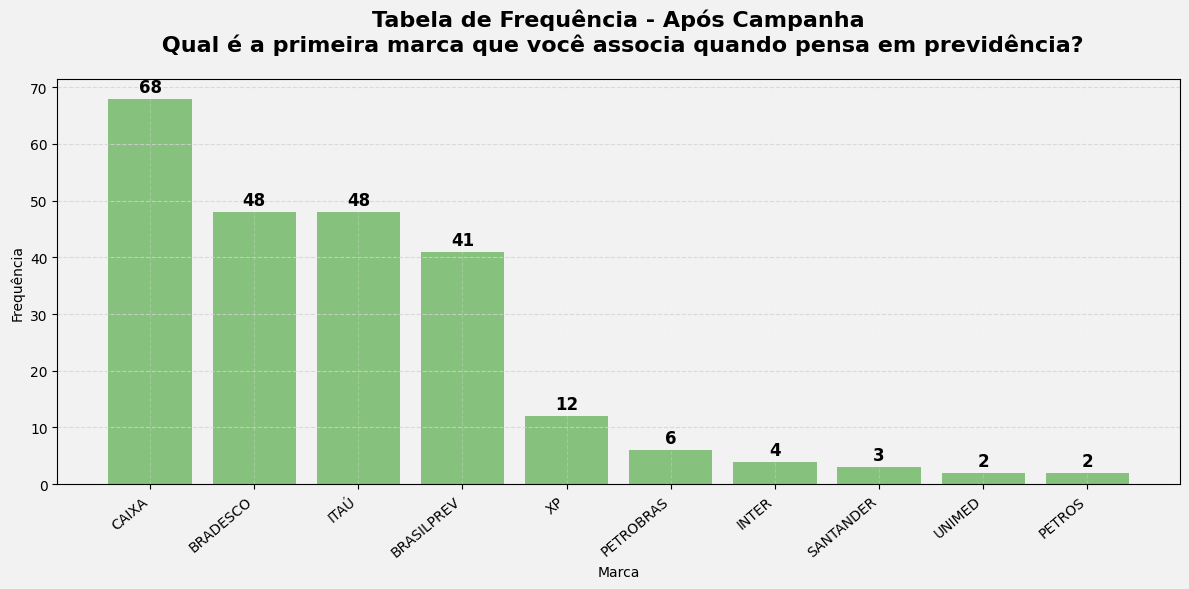

In [30]:
# Filtrar para remover a categoria "OUTROS"
respostas_df2_filtradas = df2_final[df2_final['BRAD31'] != 'OUTROS']['BRAD31']

# Contar a frequ√™ncia das respostas filtradas
contagem_df2 = respostas_df2_filtradas.value_counts()

# Selecionar as 20 mais citadas (ou aumente se quiser mais)
top_10_2 = contagem_df2.head(10)

# Criar o gr√°fico de barras
plt.figure(figsize=(12, 6), facecolor="#F2F2F2")  # fundo da figura
plt.gca().set_facecolor("#F2F2F2")
bars = plt.bar(top_10_2.index, top_10.values, color='#87C17E')

# Adicionar r√≥tulos alinhados √† direita
plt.xticks(range(len(top_10_2.index)), top_10_2.index, rotation=40, ha='right')

# Adicionar os valores de frequ√™ncia acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posi√ß√£o x (centro da barra)
        height + 0.5,  # Posi√ß√£o y (acima da barra)
        f'{int(height)}',  # Texto (valor da frequ√™ncia)
        ha='center',  # Alinhamento horizontal (centralizado)
        va='bottom',  # Alinhamento vertical (base no topo da barra)
        fontsize=12,
        fontweight='bold'
    )

# Adicionar t√≠tulo e r√≥tulos dos eixos
plt.title("Tabela de Frequ√™ncia - Ap√≥s Campanha\n Qual √© a primeira marca que voc√™ associa quando pensa em previd√™ncia?", fontsize=16, pad=20, fontweight='semibold')
plt.xlabel("Marca")
plt.ylabel("Frequ√™ncia")

# Ajustar layout e grade
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.8, color="lightgray")
plt.grid(axis='x', linestyle='--', alpha=0.2, color="white")

# Exibir o gr√°fico
plt.show()

#### Tabela de Frequ√™ncia de ambos question√°rios

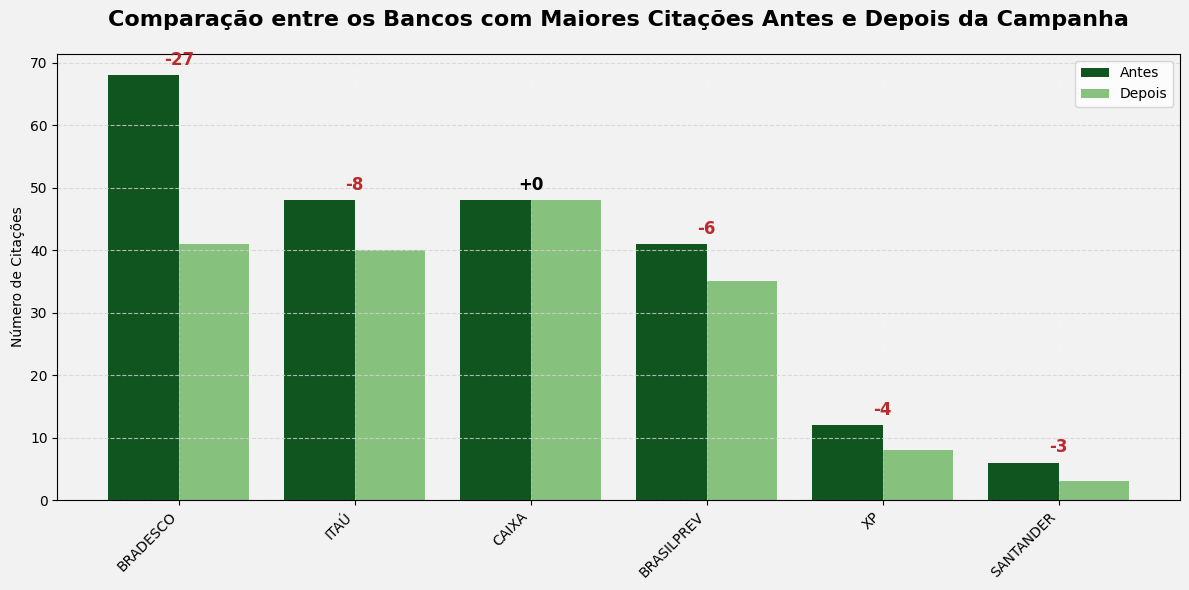

In [31]:
df_comparado = df_final[['BRAD31_antes', 'BRAD31_depois']].copy()

# Contar ocorr√™ncias
contagem_antes = Counter(df_comparado['BRAD31_antes'])
contagem_depois = Counter(df_comparado['BRAD31_depois'])

# Unir todos os nomes √∫nicos
todos_bancos = set(contagem_antes) | set(contagem_depois)

# Organizar dados em DataFrame
dados = {
    'Banco': [],
    'Antes': [],
    'Depois': []
}

for banco in todos_bancos:
    antes = contagem_antes.get(banco, 0)
    depois = contagem_depois.get(banco, 0)

    # Filtrar bancos com mais de 4 cita√ß√µes no total e excluir a categoria "OUTROS"
    if (antes > 4 or depois > 4) and banco != "OUTROS":
        dados['Banco'].append(banco)
        dados['Antes'].append(antes)
        dados['Depois'].append(depois)

# Criar DataFrame filtrado
df_plot = pd.DataFrame(dados)
df_plot = df_plot.sort_values(by='Antes', ascending=False)

# -------------------------------
# Gr√°fico de barras lado a lado
# -------------------------------


x = range(len(df_plot))
bar_width = 0.4

# Criar o gr√°fico de barras
plt.figure(figsize=(12, 6), facecolor="#F2F2F2")  # fundo da figura
plt.gca().set_facecolor("#F2F2F2")
plt.bar([i - bar_width/2 for i in x],
        df_plot['Antes'],
        width=bar_width,
        label='Antes',
        color="#105420")   # cor para Antes

plt.bar([i + bar_width/2 for i in x],
        df_plot['Depois'],
        width=bar_width,
        label='Depois',
        color="#87C17E")   # cor para Depois

# R√≥tulos de diferen√ßa
for i, (antes, depois) in enumerate(zip(df_plot['Antes'], df_plot['Depois'])):
    diferenca = depois - antes
    cor = "black" if diferenca >= 0 else "#BD2A2E"
    plt.text(i, max(antes, depois) + 1,   # posi√ß√£o acima da barra maior
             f"{diferenca:+}",             # exibe com sinal (+/-)
             ha='center', va='bottom',
             fontsize=12, color=cor, fontweight='bold')

plt.xticks(x, df_plot['Banco'], rotation=45, ha='right')
plt.ylabel("N√∫mero de Cita√ß√µes")
plt.title("Compara√ß√£o entre os Bancos com Maiores Cita√ß√µes Antes e Depois da Campanha",
          fontsize=16, pad=20, fontweight='bold')
plt.legend()

# Ajustar layout e grade
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.8, color="lightgray")
plt.grid(axis='x', linestyle='--', alpha=0.2, color="white")

plt.show()


### Teste de McNemar

O teste de McNemar √© um teste estat√≠stico para dados pareados bin√°rios, usado quando voc√™ quer comparar duas medidas de antes e depois sobre os mesmos indiv√≠duos.

No teste a seguir, foi avaliado se houve influ√™ncia significativa da campanha com rela√ß√£o a Previd√™ncia Privada BrasilPrev.

In [32]:
# Criar colunas booleanas: citou ou n√£o "BRASILPREV"
df1_final['citou_antes'] = df1_final['BRAD31'] == 'BRASILPREV'
df2_final['citou_depois'] = df2_final['BRAD31'] == 'BRASILPREV'

# Tabela de conting√™ncia
contingencia = pd.crosstab(df1_final['citou_antes'], df2_final['citou_depois'])
print("\nTabela de conting√™ncia:")
print(contingencia)

# Aplicar teste de McNemar
resultado = mcnemar(contingencia, exact=False)
print(f"\nEstat√≠stica do teste: {resultado.statistic}")
print(f"Valor-p: {resultado.pvalue:.4f}")

# Interpreta√ß√£o
if resultado.pvalue < 0.05:
    print("Diferen√ßa significativa: a campanha pode ter influenciado as respostas.")
else:
    print("Sem evid√™ncia de diferen√ßa significativa nas respostas.")


Tabela de conting√™ncia:
citou_depois  False  True 
citou_antes               
False           802     32
True             38      3

Estat√≠stica do teste: 0.35714285714285715
Valor-p: 0.5501
Sem evid√™ncia de diferen√ßa significativa nas respostas.


A tabela de conting√™ncia mostra que 802 pessoas n√£o citaram a BrasilPrev nem antes nem depois da campanha, enquanto 32 pessoas que n√£o citavam a BrasilPrev antes passaram a mencion√°-la ap√≥s a campanha. Por outro lado, 38 pessoas que citavam a BrasilPrev antes deixaram de faz√™-lo depois da campanha, e 3 pessoas continuaram citando a BrasilPrev tanto antes quanto depois.

O teste de McNemar, que avalia a signific√¢ncia estat√≠stica dessas mudan√ßas, resultou em uma estat√≠stica de teste de 0,3571 e um valor-p de 0,5501. Como o valor-p √© maior que 0,05, n√£o h√° evid√™ncia estat√≠stica de que a campanha tenha causado uma mudan√ßa significativa nas respostas relacionadas √† BrasilPrev. Isso significa que as varia√ß√µes observadas nas respostas antes e depois da campanha podem ser atribu√≠das ao acaso, e n√£o a um efeito real da campanha.

Em resumo, a campanha n√£o parece ter tido um impacto relevante na percep√ß√£o ou men√ß√£o da BrasilPrev. As mudan√ßas foram relativamente pequenas e n√£o s√£o estatisticamente significativas. Portanto, n√£o h√° evid√™ncia suficiente para concluir que a campanha influenciou de forma consistente as respostas dos participantes em rela√ß√£o √† BrasilPrev.

## An√°lise de sexo por pesquisa

In [33]:
emails_em_comum = set(df1['user_email']) & set(df2['user_email'])

df1_filtrado = df1[df1['user_email'].isin(emails_em_comum)].copy()
df2_filtrado = df2[df2['user_email'].isin(emails_em_comum)].copy()

# Renomear as colunas de BRAD31
df1_filtrado = df1_filtrado.rename(columns={'BRAD31': 'BRAD31_antes'})
df2_filtrado = df2_filtrado.rename(columns={'BRAD31': 'BRAD31_depois'})

# Fazer merge pelas colunas em comum
df_comparado = pd.merge(df1_filtrado[['user_email', 'S2A', 'BRAD31_antes']],
                        df2_filtrado[['user_email', 'BRAD31_depois']],
                        on='user_email',
                        how='inner')

sexo_contagem = df_comparado['S2A'].value_counts(dropna=False)

print("Contagem de participantes por sexo (entre os que responderam as duas rodadas):")
print(sexo_contagem)

print("\nCom percentuais:")
print((sexo_contagem / sexo_contagem.sum() * 100).round(2))


Contagem de participantes por sexo (entre os que responderam as duas rodadas):
S2A
Masculino               545
Feminino                310
Prefiro n√£o informar      9
Outro                     8
NaN                       3
Name: count, dtype: int64

Com percentuais:
S2A
Masculino               62.29
Feminino                35.43
Prefiro n√£o informar     1.03
Outro                    0.91
NaN                      0.34
Name: count, dtype: float64


### Gr√°fico representativo do g√™nero dos participantes

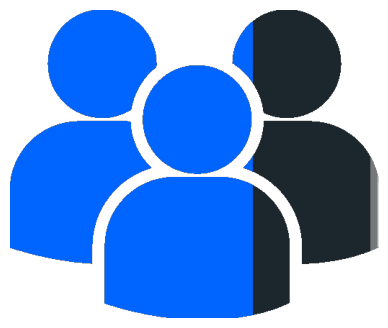

In [37]:
# @title S2A - Gr√°fico de G√™nero
import cv2
import numpy as np

# Carregar a imagem com transpar√™ncia
image_path = 'image.png'
img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Verificar se a imagem tem canal alfa (transpar√™ncia)
if img.shape[2] == 4:
    alpha_channel = img[:, :, 3]  # Extrai o canal alfa
    mask = alpha_channel > 0  # M√°scara onde a imagem √© vis√≠vel
    img_rgb = img[:, :, :3]  # Canais BGR (sem alfa)
else:
    mask = np.ones(img.shape[:2], dtype=bool)
    img_rgb = img

# Definir propor√ß√µes e cores (em BGR - formato OpenCV)
proportions = [
    (0.66, (254, 101, 0)),    # Masculino: #0065FE (BGR)
    (0.32, (45, 38, 28)),      # Feminino: #1C262D (BGR)
    (0.02, (122, 120, 117)),  # Prefiro n√£o informar: #75787A (BGR)
    (0.01, (214, 218, 217))   # Outros: #D9DAD6 (BGR)
]

# Criar imagem resultante (com transpar√™ncia)
height, width = img.shape[:2]
result = np.zeros((height, width, 4), dtype=np.uint8)  # Imagem RGBA
x_start = 0

for proportion, color in proportions:
    x_end = x_start + int(width * proportion)

    # Aplicar cor apenas onde h√° conte√∫do vis√≠vel
    section_mask = mask[:, x_start:x_end]
    result[:, x_start:x_end, :3][section_mask] = color  # Cores BGR
    result[:, x_start:x_end, 3][section_mask] = 255     # Canal alfa (opaco)
    x_start = x_end

'''
# Se quiser salvar a imagem com transpar√™ncia execute o c√≥digo abaixo:
output_path = 'imagem_com_barras.png'
cv2.imwrite(output_path, result)

print(f"Imagem salva como '{output_path}' (com transpar√™ncia)")'''

# Converter de BGR (OpenCV) para RGB
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGRA2RGBA)

plt.figure(figsize=(8, 4))
plt.imshow(result_rgb)
plt.axis("off")
plt.show()


A imagem acima foi elaborada de forma a representar a porcentagem dos g√™neros: *Masculino*, *Feminino*, *Prefiro n√£o informar* e *Outros*.

Com isso, em qualquer programa de edi√ß√£o de imagens, √© poss√≠vel ajustar a descri√ß√£o da imagem e seus respectivos valores, transformando-a no resultado abaixo:

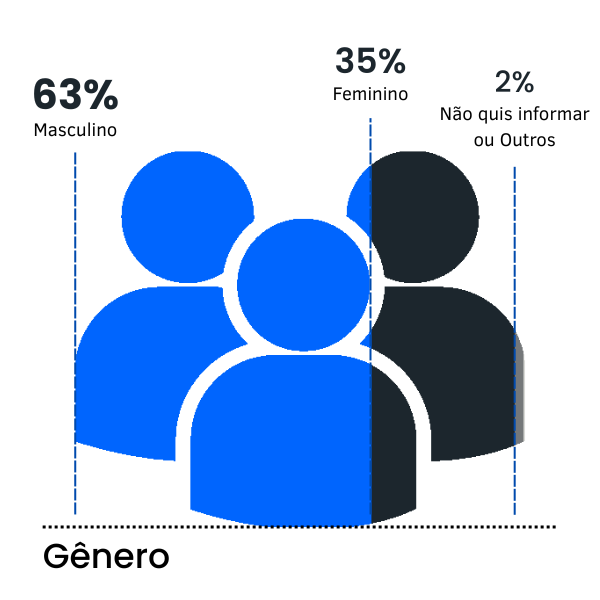